# Classification using Random Forest Classifier

Subject Code: 18AIL66

Program No.: 5

Demonstrates the working of the Random Forest algorithm.

In [51]:
# Imports required packages
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

## Loading Data Set

This experiment will use **MINST** data set and brief about this data set is as follows.

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

In [6]:
# NOTE: The following step may take several seconds to complete

# Loads the MNIST data set
mnist = fetch_openml("mnist_784", as_frame=False)

## Exploratory Data Analysis (EDA)

In [7]:
# Keys through which addition details about this data set is available are:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


As mnist.data and mnist.target properties returns the features and target, respectively, and are of our interest for this experiment, let's refer how the data and target look like.

In [8]:
display(mnist.data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Prints shape of the feature data
print(mnist.data.shape)

(70000, 784)


In [11]:
display(mnist.target)

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

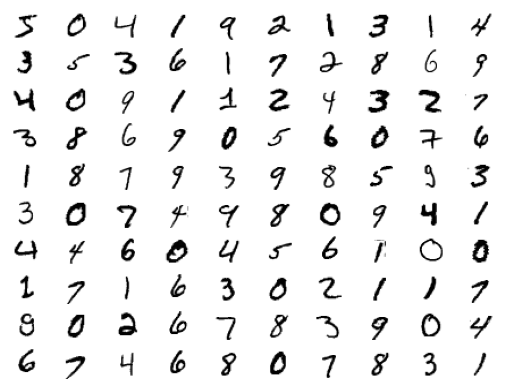

In [14]:
# Let's plot first 100 handwritten digits in a 10x10 subplots in a figure

for idx, image_data in enumerate(mnist.data[:100]):
    plt.subplot(10, 10, idx + 1)
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

plt.show()

In [15]:
# Now, just prints first 10 labels from data set target property to check matching with digits plotted.
display(mnist.target[:10])

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

## Data Preparation

In [20]:
# Splits data set into train and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.15, stratify=mnist.target, random_state=42)

In [21]:
# Prints the shape of the data sets after split
print("X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

X_train: (59500, 784), y_train: (59500,)
X_test: (10500, 784), y_test: (10500,)


In [29]:
# Let's check if the train distribution matches with the test distribution

train_unique_labels, train_unique_label_count = np.unique(
    y_train, return_counts=True)

test_unique_labels, test_unique_label_count = np.unique(
    y_test, return_counts=True)

In [48]:
print("Train set distribution:\n")
train_unique_labels, np.round(train_unique_label_count/X_train.shape[0], 3)

Train set distribution:



(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([0.099, 0.113, 0.1  , 0.102, 0.097, 0.09 , 0.098, 0.104, 0.097,
        0.099]))

In [49]:
print("Test set distribution:\n")
test_unique_labels, np.round(test_unique_label_count/X_test.shape[0], 3)

Test set distribution:



(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([0.099, 0.113, 0.1  , 0.102, 0.098, 0.09 , 0.098, 0.104, 0.098,
        0.099]))

## Modeling

In [40]:
# Initializes Random Forest classifier (with default hyperparameters)
rf_clf = RandomForestClassifier(n_jobs=-1)

In [42]:
# Measuring accuracy over Cross-Validation
rf_clf_cv_accuracy = cross_val_score(
    rf_clf, X_train, y_train, scoring="accuracy", cv=5)

In [44]:
print("Random Forest CV Error: {} (mean) [Standard Deviation (STD): {}]".format(
    np.mean(rf_clf_cv_accuracy), np.std(rf_clf_cv_accuracy)))

Random Forest CV Error: 0.9672941176470589 (mean) [Standard Deviation (STD): 0.0015342982240036738]


In [50]:
# Now, with this cross-validation error estimation, let's build model on full train data set
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [52]:
# Performs prediction on test data
test_predictions = rf_clf.predict(X_test)

In [56]:
# Prints the accuracy score against the test data
print("Accuracy on Test Data:", accuracy_score(y_test, test_predictions))

Accuracy on Test Data: 0.9673333333333334
